In [1]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/combined_survey_filtered_wout_outliers.xlsx'
df =pd.read_excel(file_path)



In [2]:
# enter the coulmns names as varibels:
# this may varay according to the different qustions you will ask in your survey (and therefore, different columns)

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
year='שנת הצעת העבודה'
company='חברה (נא לכתוב באנגלית את שם החברה)'
courses='קורסי מפתח שעשית לפני הצעת העבודה'
exp='האם היה לך ניסיון לפני קבלת המשרה?'
sem='באיזה סמסטר היית כשקיבלת את ההצעה?'

ice_cream='טעם גלידה אהוב'

# choosing the rounding density in this analyze 
rounding_density=4

In [3]:
av_df=df[salary].astype(float).sum()/len(df)
av_df
print(f"avrg salary is {av_df}, the len of the df is :{len(df)}")

avrg salary is 94.15186246418338, the len of the df is :349


In [4]:
# basic functions for different usages:

from scipy.stats import ttest_ind


#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

def create_sorted_average_dict(dict,field):
    average_dict={}
    sorted_dict={}
    #calculate the average:
    for name in dict:
        average_dict[name]=calculate_average(dict[name],field)

    #sort:
    sorted_salary_list=sorted(average_dict.items(), key=lambda x: x[1])

    for tup in sorted_salary_list:
        average_rounded=round(tup[1],rounding_density)
        new_key= tup[0]+" "+str(average_rounded)
        sorted_dict[new_key]=tup[1] 
    return sorted_dict

# recive a dict of catagories and df for the catagory, and list of catagories in the dict, and print the result of T-test bewtween each pair 
def create_ttest_for_pairs(dict,list):
    pairs=set()
    for c_var in list:
        for c_var2 in list:
            # I want to print each pair just once, so before printing I'm checking the pair wasn't already printed:         
            if (c_var,c_var2) not in pairs and (c_var2,c_var) not in pairs and c_var != c_var2:
                print(f"ttest values for {str(c_var)} and {str(c_var2)} is {print_ttest_result_rounded(ttest_ind(dict[c_var], dict[c_var2]))}")
                pairs.add((c_var,c_var2))

def print_ttest_result_rounded(ttest_result):
    return f"Ttest_result(statistic: {round(ttest_result.statistic,rounding_density)}, pvalue: {round(ttest_result.pvalue,rounding_density)})"

In [5]:
#calculate average salary and grades according to gender:

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)

print(average_salary_male)
print(average_grade_male)
print(average_salary_female)
print(average_grade_female)

print('num of mens:' +str(len(male_df)))
print('num of females:' +str(len(female_df)))

res = ttest_ind(male_df[salary], female_df[salary])

print(res)


95.03625954198473
84.42404580152672
92.46296296296296
83.09876543209876
num of mens:262
num of females:81
Ttest_indResult(statistic=1.0880802954064281, pvalue=0.2773280911762262)


In [6]:
#bargin presentage:

from unicodedata import name


precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')

bargin_m=male_df[male_df[bargin]=='כן']
n_bargin_m=male_df[male_df[bargin]=='לא']
bargin_f=female_df[female_df[bargin]=='כן']
n_bargin_f=female_df[female_df[bargin]=='לא']


print("bargin man avreage salary: "+str(calculate_average( bargin_m,salary))+ '   Amount:'+str(len(bargin_m)))
print("didn't bargin man avreage salary: "+str(calculate_average( n_bargin_m,salary))+ '   Amount:'+str(len(n_bargin_m)))
print("bargin woman avreage salary: "+str(calculate_average( bargin_f,salary))+ '   Amount:'+str(len(bargin_f)))
print("didn't bargin woman avreage salary: "+ str(calculate_average( n_bargin_f,salary))+ '   Amount:'+str(len(n_bargin_f)))


# checking for t-test values for the resutls:

bargin_keys=['bargin_m','n_bargin_m','bargin_f','n_bargin_f']
bargin_dict={}
bargin_dict['bargin_m']=male_df[male_df[bargin]=='כן'][salary]
bargin_dict['n_bargin_m']=male_df[male_df[bargin]=='לא'][salary]
bargin_dict['bargin_f']=female_df[female_df[bargin]=='כן'][salary]
bargin_dict['n_bargin_f']=female_df[female_df[bargin]=='לא'][salary]

create_ttest_for_pairs(bargin_dict,bargin_keys)


bargin man avreage salary: 94.12264150943396   Amount:53
didn't bargin man avreage salary: 95.61463414634146   Amount:205
bargin woman avreage salary: 85.71923076923076   Amount:26
didn't bargin woman avreage salary: 95.39245283018869   Amount:53
ttest values for bargin_m and n_bargin_m is Ttest_result(statistic: -0.5011, pvalue: 0.6167)
ttest values for bargin_m and bargin_f is Ttest_result(statistic: 1.9122, pvalue: 0.0596)
ttest values for bargin_m and n_bargin_f is Ttest_result(statistic: -0.3896, pvalue: 0.6976)
ttest values for n_bargin_m and bargin_f is Ttest_result(statistic: 2.4772, pvalue: 0.014)
ttest values for n_bargin_m and n_bargin_f is Ttest_result(statistic: 0.0779, pvalue: 0.938)
ttest values for bargin_f and n_bargin_f is Ttest_result(statistic: -2.6417, pvalue: 0.01)


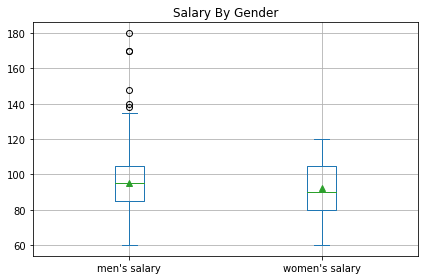

In [7]:
# Create a boxplot for gender:

import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"men\'s salary": male_df[salary].astype(float), "women\'s salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['men\'s salary', 'women\'s salary']].plot(kind='box',grid=True, showmeans=True,title='Salary By Gender')

# Display the plot
plt.show()

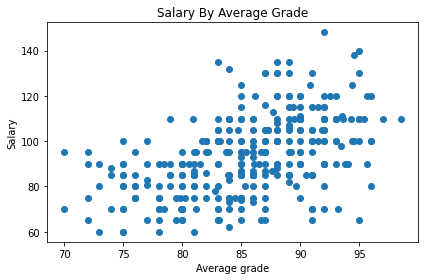

(0.5006559845489419, 7.612977142887622e-23)

In [8]:
#scatter point for grade vs salary:

#get outliers cleaned for the scatter point:
scatter_df=df
scatter_point_threshold =140
scatter_df[scatter_df[salary]>scatter_point_threshold]
scatter_df = scatter_df.drop(scatter_df[scatter_df[salary]>160].index)

#clean people who didn't fill salary or grade:

scatter_df=scatter_df[scatter_df[grade].notna()]
scatter_df=scatter_df[scatter_df[salary].notna()]
scatter_df


#plot scatter points:
x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)
plt.scatter(x,y)
plt.title("Salary By Average Grade")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()



#check correlation between salary and grades using pearsonr test:

from scipy.stats import pearsonr
grades=scatter_df[grade].astype(float).dropna()
salaris=scatter_df[salary].astype(float).dropna()
pearsonr(grades, salaris )


In [9]:
#Company sector:
# 
# calculate num of exmples from each company:
temp_df=df
num_of_examples={}
companies_names=['Intel','Microsoft','Amazon','Google','Facebook','Apple','IBM','Rafael','Elbit','Plus500','Nvidia','Mobileye']
for company_name in companies_names:
        num_of_examples[company_name]=len(temp_df[temp_df[company]==company_name])
print(num_of_examples)

#remove all companies with less than 9 repliers
common_companies=[]
for company_name in companies_names:
        if num_of_examples[company_name] >= 9:
                common_companies.append(company_name)
print(common_companies)

#create common company dict:
companies_dict={}

for company_name in common_companies:
    companies_dict[company_name]=df[df[company]==company_name]


#create common company dict - only of salaries:
salaries_companies_dict={}
for company_name in common_companies:
    salaries_companies_dict[company_name]=df[df[company]==company_name][salary]

# check mean value and num of repliers:
for current_company in salaries_companies_dict:
        num_in_comp = len(salaries_companies_dict[current_company])
        print(f'in company {current_company} we have {num_in_comp} replies, the average salary is {salaries_companies_dict[current_company].astype(float).sum()/num_in_comp}')



#t-test for companies:

create_ttest_for_pairs(dict= salaries_companies_dict, list= common_companies)

{'Intel': 81, 'Microsoft': 20, 'Amazon': 22, 'Google': 2, 'Facebook': 4, 'Apple': 12, 'IBM': 11, 'Rafael': 40, 'Elbit': 15, 'Plus500': 2, 'Nvidia': 13, 'Mobileye': 9}
['Intel', 'Microsoft', 'Amazon', 'Apple', 'IBM', 'Rafael', 'Elbit', 'Nvidia', 'Mobileye']
in company Intel we have 81 replies, the average salary is 88.76172839506172
in company Microsoft we have 20 replies, the average salary is 111.0
in company Amazon we have 22 replies, the average salary is 106.0
in company Apple we have 12 replies, the average salary is 107.5
in company IBM we have 11 replies, the average salary is 105.9090909090909
in company Rafael we have 40 replies, the average salary is 71.275
in company Elbit we have 15 replies, the average salary is 91.46666666666667
in company Nvidia we have 13 replies, the average salary is 110.0
in company Mobileye we have 9 replies, the average salary is 107.77777777777777
ttest values for Intel and Microsoft is Ttest_result(statistic: -8.1066, pvalue: 0.0)
ttest values fo

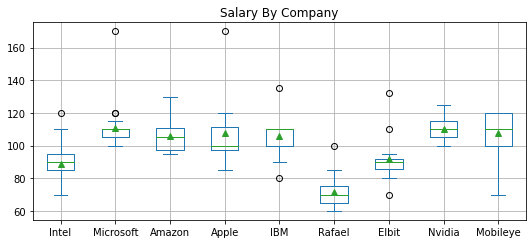

In [10]:
# box plot by company:

import matplotlib.pyplot as plt

for current_company in companies_dict:
    current_df=companies_dict[current_company]
    companies_dict[current_company]=(current_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(companies_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,showmeans=True,title='Salary By Company')

# Display the plot
plt.show()

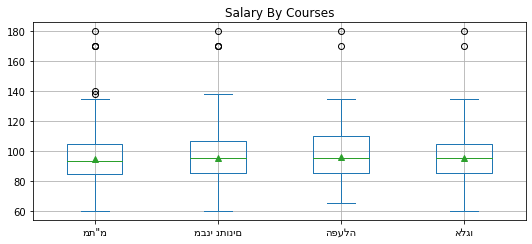

num of replies in מת"מ is 332
num of replies in מבני נתונים is 302
num of replies in הפעלה is 170
num of replies in אלגו is 176
ttest values for מת"מ and מבני נתונים is Ttest_result(statistic: -0.5034, pvalue: 0.6149)
ttest values for מת"מ and הפעלה is Ttest_result(statistic: -0.7057, pvalue: 0.4807)
ttest values for מת"מ and אלגו is Ttest_result(statistic: -0.4207, pvalue: 0.6741)
ttest values for מבני נתונים and הפעלה is Ttest_result(statistic: -0.2825, pvalue: 0.7777)
ttest values for מבני נתונים and אלגו is Ttest_result(statistic: 0.0101, pvalue: 0.9919)
ttest values for הפעלה and אלגו is Ttest_result(statistic: 0.2627, pvalue: 0.793)
{'מת"מ 94.747': 94.74698795180723, 'אלגו 95.479': 95.47897727272726, 'מבני נתונים 95.4967': 95.49668874172185, 'הפעלה 96.0018': 96.00176470588235}


In [11]:
# courses:
mtm='מת"מ'
mivni='מבני נתונים'
operation_s='הפעלה'
algo='אלגו'

df_by_courses={}
courses_names=[mtm,mivni,operation_s,algo]

for course in courses_names:
    df_by_courses[course] = df.loc[df[courses].str.contains(course,na=False)]

courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)

courses_dict={}

for course in courses_names:
    courses_dict[course]=(df.loc[df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses')

# Display the plot
plt.show()

# check mean value and num of repliers:
for current_c in courses_dict:
        print(f'num of replies in {current_c} is {len(courses_dict[current_c])}')

# check for ttest values:

create_ttest_for_pairs(courses_dict,courses_names)

courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)
print(courses_average_dict)

{'מת"מ 93.9598': 93.95977443609023, 'מבני נתונים 94.819': 94.81902834008096, 'אלגו 95.5715': 95.57152777777777, 'הפעלה 95.9877': 95.98768115942029}


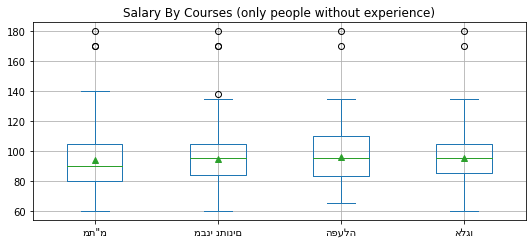

In [12]:
#check courses among ones without exp:

no_exp='ללא ניסיון כלל'
no_exp_df=df[df[exp]==no_exp]

no_exp_courses_dict={}

for key in df_by_courses:
    current_course_df=df_by_courses[key]
    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]


courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
print(courses_noexp_average_dict)



for course in courses_names:
    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people without experience)')

# Display the plot
plt.show()

In [13]:
#function that used to check and plot averge salary according to courses people took only in spesific semster,
#use to check assumption that wasnt true
def checkBySemster(semester_num):
    #sem5 no exp
    semster=semester_num
    sem_df=no_exp_df[no_exp_df[sem]==semster]

    sem5_courses_dict={}

    for key in df_by_courses:
        current_course_df=df_by_courses[key]
        sem5_courses_dict[key] = current_course_df[current_course_df[exp]==semster]


    sem_average_dict = create_sorted_average_dict(dict=sem5_courses_dict,field= salary)
    print(sem_average_dict)

    for course in courses_names:
        courses_dict[course]=(sem_df.loc[sem_df[courses].str.contains(course,na=False)][salary]).astype(float)

    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # Pandas dataframe
    #combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
    combined_dfs=pd.DataFrame(courses_dict)
    # Plot the dataframe
    ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people from semster '+str(semester_num)+' )')

    # Display the plot
    plt.show()

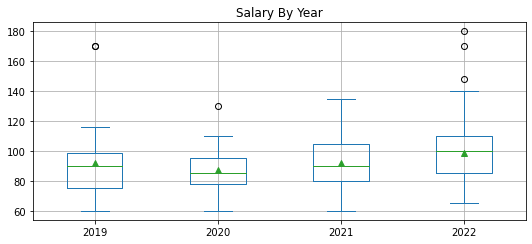

len of 2019 is 26 and mean is 91.95384615384616
len of 2020 is 49 and mean is 87.13673469387754
len of 2021 is 105 and mean is 91.72380952380952
len of 2022 is 167 and mean is 98.54790419161677
ttest values for 2019 and 2020 is Ttest_result(statistic: 1.012, pvalue: 0.3149)
ttest values for 2019 and 2021 is Ttest_result(statistic: 0.0546, pvalue: 0.9565)
ttest values for 2019 and 2022 is Ttest_result(statistic: -1.5412, pvalue: 0.1249)
ttest values for 2020 and 2021 is Ttest_result(statistic: -1.617, pvalue: 0.108)
ttest values for 2020 and 2022 is Ttest_result(statistic: -3.8326, pvalue: 0.0002)
ttest values for 2021 and 2022 is Ttest_result(statistic: -2.9774, pvalue: 0.0032)


In [14]:
# average salary according to year:
dict_df_years={}
years=[2019,2020,2021,2022]

for c_year in years:
        dict_df_years[c_year]=(df[df[year]==c_year][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(dict_df_years)
# Plot the dataframe
ax = combined_dfs.plot(kind='box', showmeans=True,grid=True,title='Salary By Year')

# Display the plot
plt.show()

for c_year in years:
    print(f"len of {c_year} is {len(dict_df_years[c_year])} and mean is {dict_df_years[c_year].mean()}")

create_ttest_for_pairs(dict_df_years,years)

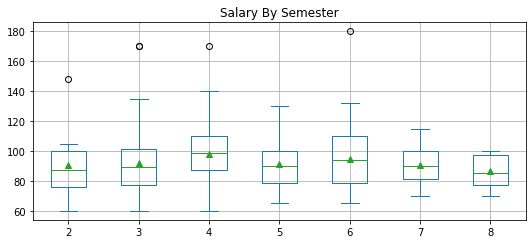

in semester 2 we have 10 replies, the average salary is 90.8
in semester 3 we have 56 replies, the average salary is 92.26785714285714
in semester 4 we have 126 replies, the average salary is 98.2952380952381
in semester 5 we have 76 replies, the average salary is 91.23684210526316
in semester 6 we have 56 replies, the average salary is 94.87142857142858
in semester 7 we have 16 replies, the average salary is 90.75
in semester 8 we have 7 replies, the average salary is 86.42857142857143
ttest values for 2 and 3 is Ttest_result(statistic: -0.1838, pvalue: 0.8548)
ttest values for 2 and 4 is Ttest_result(statistic: -1.2353, pvalue: 0.2189)
ttest values for 2 and 5 is Ttest_result(statistic: -0.0759, pvalue: 0.9396)
ttest values for 2 and 6 is Ttest_result(statistic: -0.5365, pvalue: 0.5935)
ttest values for 2 and 7 is Ttest_result(statistic: 0.0068, pvalue: 0.9946)
ttest values for 2 and 8 is Ttest_result(statistic: 0.4247, pvalue: 0.6771)
ttest values for 3 and 4 is Ttest_result(statist

In [15]:
# check salary by semester only in 2022:
dict_df_semester={}
semesters=[]
semesters.extend(range(2,9))

# fill dict with all the different semesters
for c_sem in semesters:
        dict_df_semester[c_sem]=(df[df[sem]==c_sem][salary]).astype(float)



# box plot:

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(dict_df_semester)
# Plot the dataframe
ax = combined_dfs.plot(kind='box', showmeans=True,grid=True,title='Salary By Semester')

# Display the plot
plt.show()


# check mean value and num of repliers:
for c_sem in semesters:
        num_in_sem = len(dict_df_semester[c_sem])
        print(f'in semester {c_sem} we have {num_in_sem} replies, the average salary is {dict_df_semester[c_sem].astype(float).sum()/num_in_sem}')


# check ttest:

create_ttest_for_pairs(dict_df_semester,semesters)

In [16]:
#General info for the doc:

print(f"The average salary in 2022 is {dict_df_years[2022].mean()}, and N of 2022 is : {len(dict_df_years[2022])}")
df22=df[df[year]==2022]
df2022_n_prior_exp=df22[df22[exp]==no_exp]
print(f"The average salary in 2022 without prior exp is {df2022_n_prior_exp[salary].mean()}, and N of 2022 is : {len(df2022_n_prior_exp)}")

The average salary in 2022 is 98.54790419161677, and N of 2022 is : 167
The average salary in 2022 without prior exp is 98.63953488372093, and N of 2022 is : 129


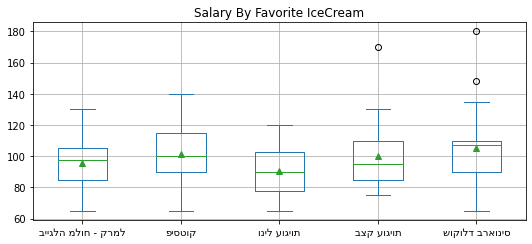

in flavor בייגלה מלוח - קרמל we have 38 replies, the average salary is 95.39473684210526
in flavor פיסטוק we have 44 replies, the average salary is 101.3409090909091
in flavor וניל עוגיות we have 23 replies, the average salary is 90.65217391304348
in flavor בצק עוגיות we have 25 replies, the average salary is 100.34
in flavor שוקולד בראוניס we have 28 replies, the average salary is 105.14285714285714
ttest values for בייגלה מלוח - קרמל and פיסטוק is Ttest_result(statistic: -1.5363, pvalue: 0.1284)
ttest values for בייגלה מלוח - קרמל and וניל עוגיות is Ttest_result(statistic: 1.1246, pvalue: 0.2653)
ttest values for בייגלה מלוח - קרמל and בצק עוגיות is Ttest_result(statistic: -1.0672, pvalue: 0.2901)
ttest values for בייגלה מלוח - קרמל and שוקולד בראוניס is Ttest_result(statistic: -2.0388, pvalue: 0.0456)
ttest values for פיסטוק and וניל עוגיות is Ttest_result(statistic: 2.2944, pvalue: 0.025)
ttest values for פיסטוק and בצק עוגיות is Ttest_result(statistic: 0.2028, pvalue: 0.8399)
ttes

In [17]:
#Ice cream sector:

ice_cream_df_dict={}
ice_ceam_names=['בייגלה מלוח - קרמל','פיסטוק','וניל עוגיות','בצק עוגיות','שוקולד בראוניס']

for ice_cream_name in ice_ceam_names:
    ice_cream_df_dict[ice_cream_name]=df[df[ice_cream]==ice_cream_name]   

for flavor in ice_cream_df_dict:
    c_df=ice_cream_df_dict[flavor]
    ice_cream_df_dict[flavor]=(c_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(ice_cream_df_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Favorite IceCream')

# Display the plot
plt.show() 


# check mean value and num of repliers:
for c_ice in ice_ceam_names:
        num_in_ice_crem = len(ice_cream_df_dict[c_ice])
        print(f'in flavor {c_ice} we have {num_in_ice_crem} replies, the average salary is {ice_cream_df_dict[c_ice].astype(float).sum()/num_in_ice_crem}')


# check ttest:

create_ttest_for_pairs(ice_cream_df_dict,ice_ceam_names)